In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
data['price'].describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

In [4]:
data.shape

(545, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
data.isnull().sum()*100/data.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

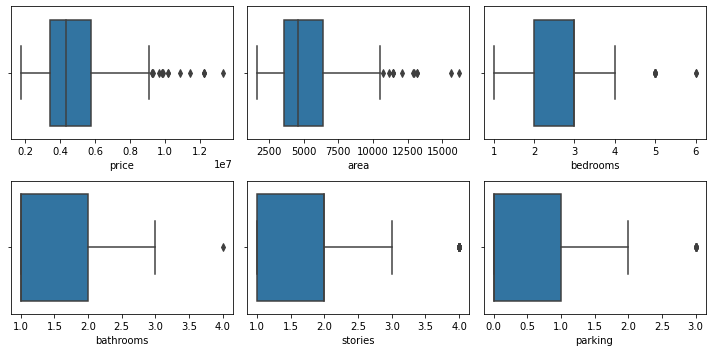

In [7]:
fig, axs = plt.subplots(2, 3, figsize = (10,5))
plt1 = sns.boxplot(data=data, x = 'price', ax = axs[0,0])
plt2 = sns.boxplot(data=data, x = 'area', ax = axs[0,1])
plt3 = sns.boxplot(data=data, x = 'bedrooms', ax = axs[0,2])
plt1 = sns.boxplot(data=data, x = 'bathrooms', ax = axs[1,0])
plt2 = sns.boxplot(data=data, x = 'stories', ax = axs[1,1])
plt3 = sns.boxplot(data=data, x = 'parking', ax = axs[1,2])

plt.tight_layout()

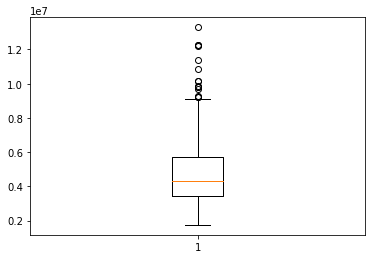

In [8]:
plt.boxplot(data.price)
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]

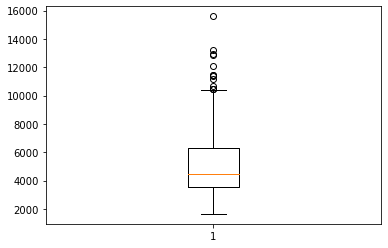

In [9]:
plt.boxplot(data.area)
Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.area >= Q1 - 1.5*IQR) & (data.area <= Q3 + 1.5*IQR)]

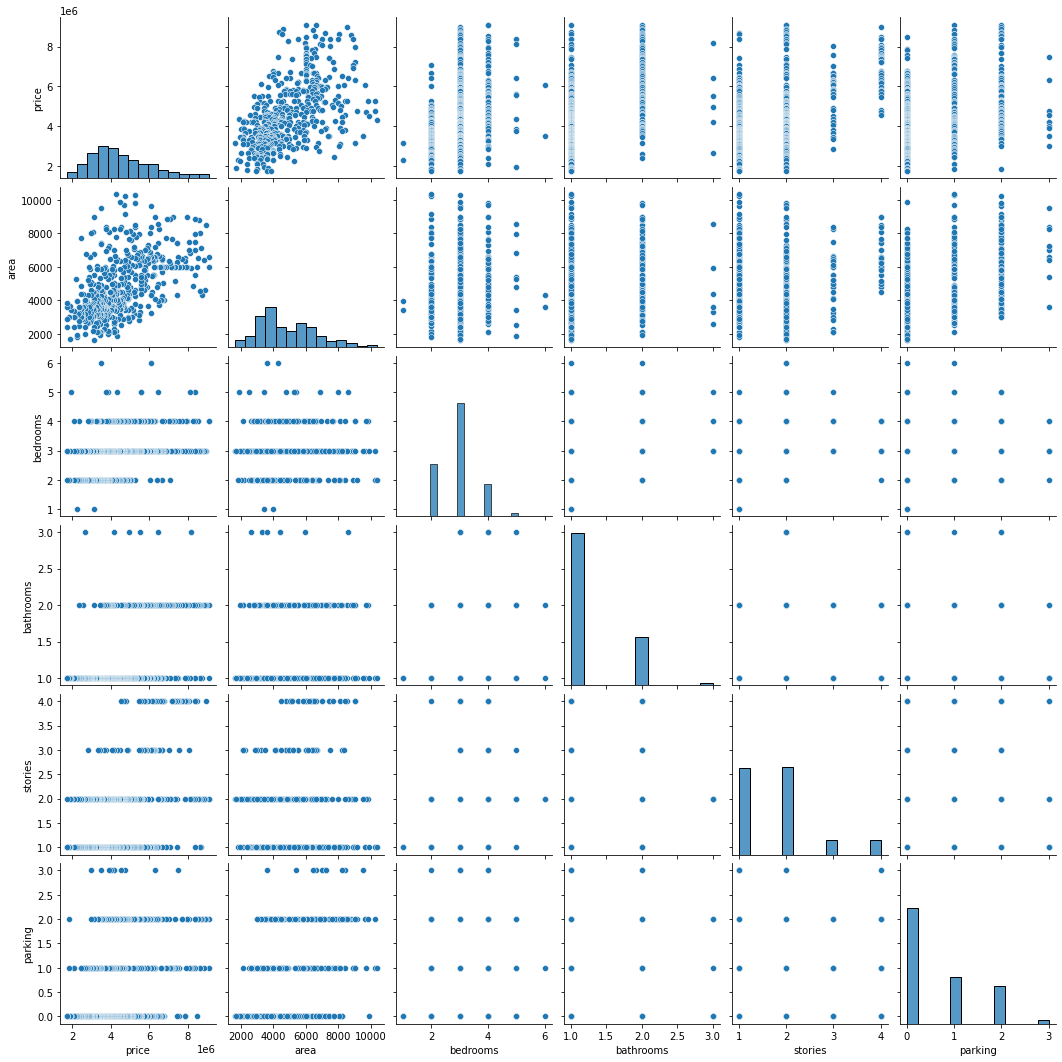

In [10]:
sns.pairplot(data)
plt.show()

In [11]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no':0})

data[varlist] = data[varlist].apply(binary_map)

In [12]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [13]:
status = pd.get_dummies(data['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [14]:
status = pd.get_dummies(data['furnishingstatus'], drop_first = True)

In [15]:
data = pd.concat([data, status], axis = 1)

In [16]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [18]:
data.drop(['furnishingstatus'], axis = 1, inplace = True)

In [19]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


In [52]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train = df_train.copy()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [23]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
244,0.375000,0.427241,0.333333,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
287,0.326923,0.448196,0.333333,0.0,0.333333,1,0,0,0,1,0.000000,0,0,1
166,0.480769,0.715949,0.333333,0.0,0.000000,1,0,1,0,1,0.666667,1,0,1
176,0.471154,0.799767,0.333333,0.0,0.000000,1,0,0,0,1,0.666667,0,0,0
282,0.336538,0.061118,0.333333,0.0,0.333333,0,1,1,0,1,0.000000,0,0,1


In [24]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.377169,0.383977,0.305556,0.137821,0.256410,0.794872,0.198718,0.339744,0.051282,0.294872,0.215812,0.237179,0.275641,0.416667
std,0.235895,0.214846,0.233282,0.251279,0.290460,0.405096,0.400320,0.475147,0.221283,0.457454,0.267216,0.426723,0.448276,0.494594
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.201923,0.227008,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.334135,0.364377,0.333333,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.512019,0.511350,0.333333,0.125000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


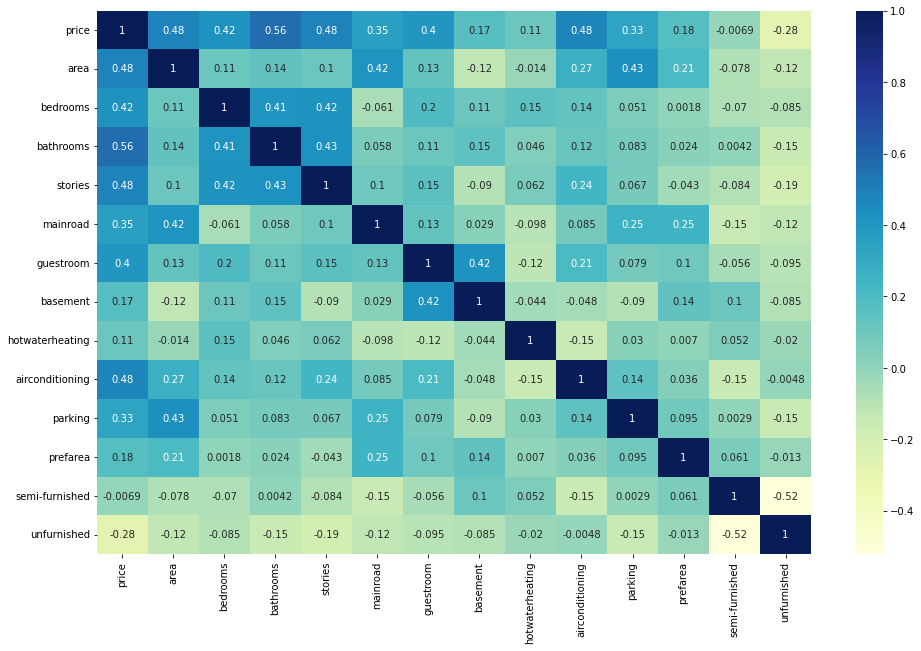

In [25]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [26]:
y_train = df_train.pop('price')
X_train = df_train

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [32]:
rfe = RFE(estimator=lm,n_features_to_select=6)  
rfe = rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 3),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 2),
 ('guestroom', True, 1),
 ('basement', False, 6),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 4),
 ('prefarea', False, 8),
 ('semi-furnished', False, 7),
 ('unfurnished', False, 5)]

In [34]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'guestroom', 'hotwaterheating',
       'airconditioning'],
      dtype='object')

In [35]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'basement', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [36]:
X_train_rfe = X_train[col]

In [37]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [38]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [39]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     55.08
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           2.13e-35
Time:                        09:54:35   Log-Likelihood:                 95.631
No. Observations:                 156   AIC:                            -177.3
Df Residuals:                     149   BIC:                            -155.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0844      0.024     

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.80
3,stories,1.29
2,bathrooms,1.24
6,airconditioning,1.19
1,area,1.10
4,guestroom,1.08
5,hotwaterheating,1.05


In [42]:
y_train_price = lm.predict(X_train_rfe)

In [43]:
res = (y_train_price - y_train)

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

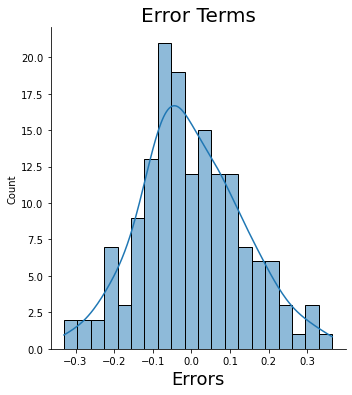

In [48]:
error_terms = y_train - y_train_price
sns.displot(error_terms, bins=20, kde=True) 
plt.title('Error Terms', fontsize=20)                  
plt.xlabel('Errors', fontsize=18)
plt.show()

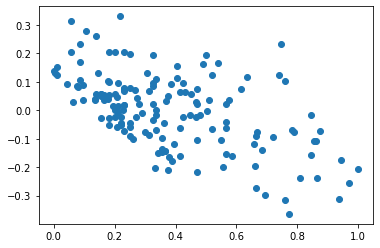

In [49]:
plt.scatter(y_train,res)
plt.show()

In [50]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [54]:
df_test = df_test.copy()
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [55]:
y_test = df_test.pop('price')
X_test = df_test

In [56]:
X_test = sm.add_constant(X_test)

In [57]:
X_test_rfe = X_test[X_train_rfe.columns]

In [58]:
y_pred = lm.predict(X_test_rfe)

In [59]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.6892460658783657

Text(0, 0.5, 'y_pred')

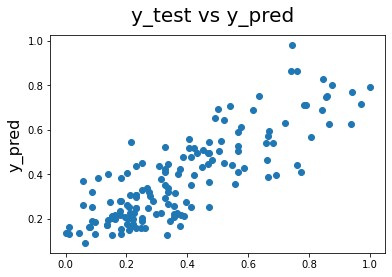

In [60]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.ylabel('y_pred', fontsize=16)   